In [19]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Add Methods notebook to this notebook
%run Network/Colab/Methods.ipynb

Network/Colab/Methods.ipynb:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "name": "Methods.ipynb másolata",


In [21]:
# Read in data files

entGreedyDist = csv2list("Network/Data/Centroid1/entDistGreedy1")
entBFSDist = csv2list("Network/Data/Centroid1/entNodesBFS1")
entShortestDist = csv2list("Network/Data/Centroid1/entDistShortest1")
# entRandDist = csv2list("entDistNew")
# entRandBoundaryDist = csv2list("entDistBoundary")
# entRandBoundary5Dist = csv2list("entDistBoundary5")

In [22]:
# Pair entropy values to paths

greedy = getList(entGreedyDist)
bfs = getList(entBFSDist)
shortest = getList(entShortestDist)
# rand = getList(entRandDistList)
# randBoundary = getList(entRandBoundaryDistList)
# randBoundary5 = getList(entRandBoundaryDist5List)

In [23]:
# Calculate average entropy values for each routing tables

greedy_avg = avgEntropy(greedy)
bfs_avg = avgEntropy(bfs)
shortest_avg = avgEntropy(shortest)
# rand_avg = avgEntropy(rand)
# randBoundary_avg = avgEntropy(randBoundary)
# randBoundary5_avg = avgEntropy(randBoundary5)

In [28]:
for i in range(len(bfs_avg)):
  if bfs_avg[i] != shortest_avg[i]:
    print(bfs_avg[i]," - ",shortest_avg[i])

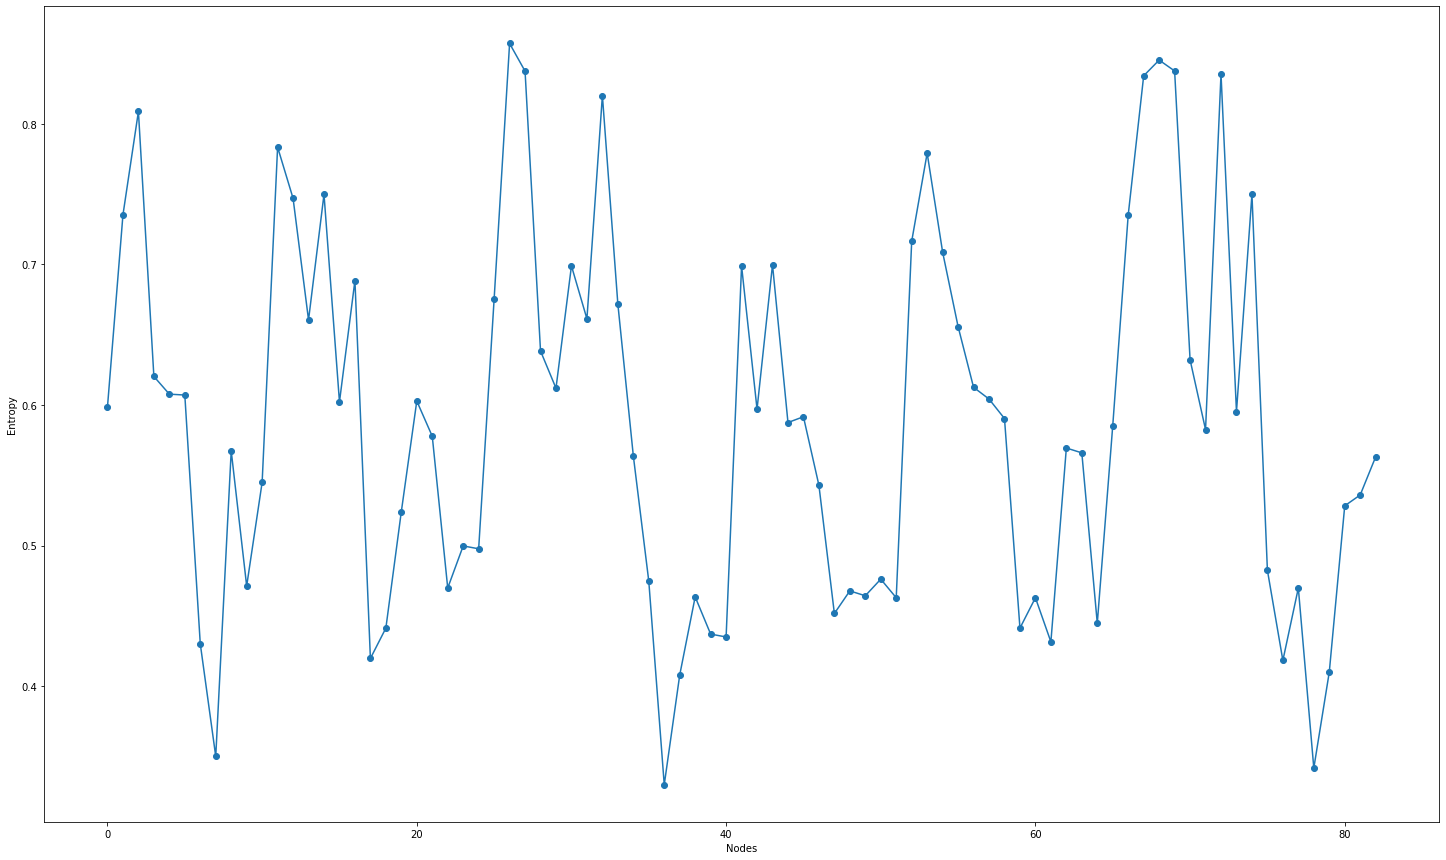

In [25]:
x_axes = [*range(0, len(positions[0]), 1)]

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)

# naming the x axis
plt.xlabel('Nodes')
# naming the y axis
plt.ylabel('Entropy')

# Blue
# plt.plot(x_axes, greedy_avg, marker='o')
# Green
# plt.plot(x_axes, shortest_avg, marker='o')
# Orange
plt.plot(x_axes, bfs_avg, marker='o')

plt.show()

In [26]:
diffGreedyShortest = []

for i in range(len(positions[0])):
     diffGreedyShortest.append(greedy_avg[i]-shortest_avg[i])

avgDiff = 0
for i in diffGreedyShortest:
    avgDiff += i
    
avgDiff = avgDiff/len(positions[0])

# Greedy algorithm average entropy is greater with than dijkstra
avgDiff

0.008520035158121116

In [27]:
# Calculate the difference between shortest path algorith entropy and greedy algortihm entropy for the same starting and endpont

sum = []
for i in range(len(entGreedyDist)):
    sum.append(entShortestDist[i]-entGreedyDist[i])
diff = getList(sum)
diff = sorted(diff, key=lambda x: x[0])